# Inaugural Project

## Introduction
This project models a household's choice between market work, home production, and leisure.
The associated py-file contains most of the code used to set up the model. 

Here is a brief overview of what the different classes in the py-file does:

- In the __init__() method: the model is set up, and the parameters are set up and the solution namespace.
- The calc_utility() method: calculates the utility of a given set of choices of market work, home production, and leisure.
- The solve_discrete() method: solves the model by discretizing the choice space and finding the maximum of the utility function subject to the household's time constraint.
- The solve_continuous() method: solves the model using continuous optimization by minimizing the utility function subject to the time constraint.

The model assumes that the household's utility is a function of the consumption of market goods and home production, subject to disutility they get from working both in the market and in the home. The preference parameter omega determines the relative weight of consumption of market goods and home production in the utility function. The household also has a disutility of work parameter epsilon that determines the curvature of the disutility of work function. The household can choose how much time to allocate to market work, home production, and leisure subject to a time constraint. The time constraint equals to day and night, so 24 hours. 

#### Imports and set magics:

In [73]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import numpy as np
from types import SimpleNamespace
import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm 
import pickle
from mpl_toolkits.mplot3d import Axes3D

from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1
We illustrate how the ratio of female home production hours/male home production hours, $H_F/H_M$, changes when we vary the productivity, $\alpha$, $\in$ {0.25, 0.50, 0.75} and the elasticity of substitution, $\sigma$ = {0.5, 1.0, 1.5}. First, the model is solved discretly so that the choice of working hours can be between half hours. This is done by calling the model from the 'py' file and assigning values to $\alpha$ and $\sigma$ repsectively. 

In [74]:
# 1. Calling the model from the py-file
model = HouseholdSpecializationModelClass()

# 2. Define the different values alpha and sigma can take
alpha_values = [0.25, 0.50, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# 3. Then we create empty arrays to store the results for each combination of alpha and sigma
HF_values = np.zeros((len(alpha_values), len(sigma_values)))
HM_values = np.zeros((len(alpha_values), len(sigma_values)))
HF_HM_ratios = np.zeros((len(alpha_values), len(sigma_values)))


# 4. We solve the model for each combination of parameters and store the results
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        model.par.alpha = alpha
        model.par.sigma = sigma
        result = model.solve_discrete()
        HF_values[i, j] = result.HF
        HM_values[i, j] = result.HM
        # To avoid devision by zero we have implemented this "if else" statement where in the case of zero nan is used instead
        if result.HM != 0:
            HF_HM_ratios[i, j] = result.HF / result.HM
        else:
            HF_HM_ratios[i, j] = np.nan

        
# 5. The results are saved by creating arrays and using pickle
with open('results.pkl', 'wb') as f:
    pickle.dump((alpha_values, sigma_values, HF_values, HM_values, HF_HM_ratios), f)

# 6. Load the results arrays from the pickle file
with open('results.pkl', 'rb') as f:
    alpha_values, sigma_values, HF_values, HM_values, HF_HM_ratios = pickle.load(f)

/Users/miehustad/Desktop/IntroProg/examprep/inauguralproject.py:67: RuntimeWarning: divide by zero encountered in reciprocal
  # c. total consumption utility
/Users/miehustad/Desktop/IntroProg/examprep/inauguralproject.py:67: RuntimeWarning: invalid value encountered in reciprocal
  # c. total consumption utility
/Users/miehustad/Desktop/IntroProg/examprep/inauguralproject.py:71: RuntimeWarning: invalid value encountered in reciprocal
  # d. disutlity of work


After finding the optimal values we plot a three dimensional plot in order to display all the relations. 

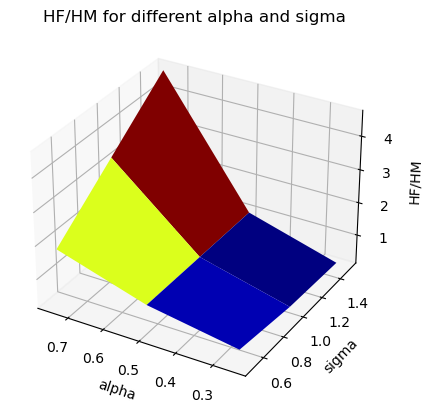

In [75]:
# 7. Making arrays for alpha and sigma
alpha = np.array([0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75]).reshape(3,3)
sigma = np.array([0.5, 1, 1.5, 0.5, 1, 1.5, 0.5, 1, 1.5]).reshape(3,3)

# 8. making the plot surface 
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha,sigma,HF_HM_ratios,cmap=cm.jet)

# 9. adding labels
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM')

# 10. inverting xaxis
ax.invert_xaxis()

# 11. adding the main title
ax.set_title('HF/HM for different alpha and sigma')

plt.show()

We observe that with increasing alpha and sigma the female home production relative to male home production increases.  Alpha is the female 
productivity in home production. When alpha increases, the female is more productive in home production, and therefore the amount of home production she makes is larger. As sigma represents the elasticity of substitution we see that when it increases, alongside an increase in alpha, it gets more "costly" to substitute female home production for male home production as the female is more productive.

## Question 2
We plot log $H_F/H_M$ against log $w_F/w_M$ for $w_F$ $\in$ $[0.8, 0.9, 1.0, 1.1, 1.2]$ using the results from question 1 but changing the female wage to differnt values to see how the household changes their optimal solution when faced with different scenarios of the female wage. 


In [76]:
# 1. Calling the model from the py-file
model = HouseholdSpecializationModelClass()

# 2. Defining the different values the female wages can take
female_wage  = [0.8, 0.9, 1.0, 1.1, 1.2]

# 3. Solving the model for each combination of parameters and store the results
# Creating empty list to store the values
HF_values = []
HM_values = []
HF_HM_ratios = []

for wage in female_wage:
    model.par.wF = wage
    result = model.solve_discrete()
    HF_values.append(result.HF)
    HM_values.append(result.HM)
    HF_HM_ratios.append(np.log(result.HF / result.HM))

# 4. Save the results arrays using pickle
with open('results2.pkl', 'wb') as f:
    pickle.dump((HF_values, HM_values, HF_HM_ratios), f)

# 5. Loads the results arrays from the pickle file
with open('results2.pkl', 'rb') as f:
    HF_values, HM_values, HF_HM_ratios = pickle.load(f)

Then we plot the arrays against each other. 

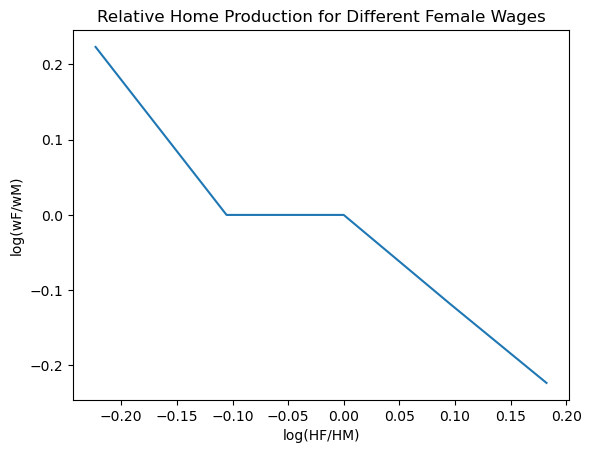

In [77]:
# 6. Define the two arrays we are ploting
Ln_HFHM = np.array(HF_HM_ratios)
female_wage  = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
male_wage  = np.array([1, 1, 1, 1, 1])
Ln_Wage = np.log(female_wage / male_wage)

# 7. Create a new figure and axis object
fig, ax = plt.subplots()

# 8. Plot the arrays
ax.plot(Ln_Wage, Ln_HFHM)

# 9. Add axis labels and a title
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)')
ax.set_title('Relative Home Production for Different Female Wages')

# 10. Display the plot
plt.show()

When holding male wages constant we can see from the plot that when female wages increase, female home produciton decreases. To elaborate, wage equality seem to also lead to equality in home prodution, whereas wage inequality leads to more disparaties in home produciton. 

## Question 3
Updated assumption: The choice of working hours is continous i.e. $L_M$, $L_F$, $H_M$, $H_F$ $\in$ [0,24]. 

We solve the model again but now continously. So, the household no longer need to choose half hours when choosing their optimal allocation. We now use the continous solver from the py-file. 


In [78]:
# 1. Calling the model 
model = HouseholdSpecializationModelClass()

# 2, Defining the different values alpha and sigma can take
female_wage  = [0.8, 0.9, 1.0, 1.1, 1.2]


# 3. Solving the model for each combination of parameters and storing the results
HF_values = []
HM_values = []
HF_HM_ratios = []

for wage in female_wage:
    model.par.wF = wage
    result = model.solve_continuous()
    HF_values.append(result.HF)
    HM_values.append(result.HM)
    HF_HM_ratios.append(np.log(result.HF / result.HM))

# 4. Saving the results arrays using pickle
with open('results2.pkl', 'wb') as f:
    pickle.dump((HF_values, HM_values, HF_HM_ratios), f)

# 5. Load the results arrays from the pickle file
with open('results2.pkl', 'rb') as f:
    HF_values, HM_values, HF_HM_ratios = pickle.load(f)

/Users/miehustad/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


We plot log $H_F/H_M$ against log $w_F/w_M$ for $w_F$ $\in$ $[0.8, 0.9, 1.0, 1.1, 1.2]$.


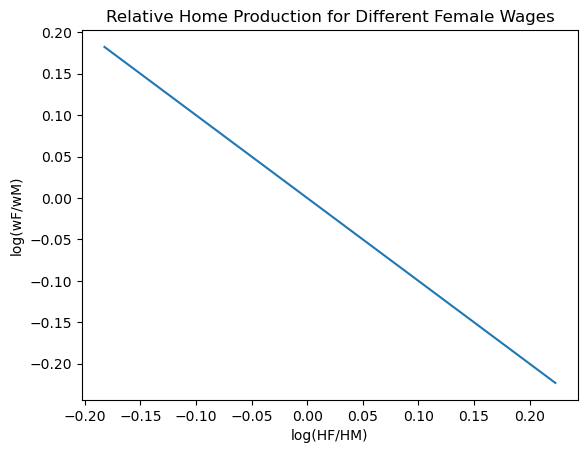

In [79]:
# 6. Defining the two arrays
Ln_HFHM = np.array(HF_HM_ratios)
female_wage  = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
male_wage  = np.array([1, 1, 1, 1, 1])
Ln_Wage = np.log(female_wage / male_wage)

# 7. Creates a new figure and axis object
fig, ax = plt.subplots()

# 8. Plotting the two arrays 
ax.plot(Ln_HFHM, Ln_Wage)

# 9. Adding the axis labels and the title
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)')
ax.set_title('Relative Home Production for Different Female Wages')

# 10. Display the plot
plt.show()

Compared to the plot in question 2 we see that the line is now straight as the optimal solutions are continous. The same effect is captured here as in the discrete solution as a higher female wage leads her to having less home production relative to the male. 


## Question 4
We firstly use the optimal solution obtained in question 3, the $H_F$ and $H_M$ values, in order to replicate the regression conducted by Siminiski and Yetsenga. Then we find the optimal values for $\alpha$ and $\sigma$ in order to minimize the squared errors between $\beta_0$ and $\hat{\beta}_0$ and $\beta_1$ and $\hat{\beta}_1$. In order words, so that $(\beta_0-\hat{\beta}_0)^2 + (\beta_1-\hat{\beta}_1)^2$ is minimized. 


In [80]:
# 1. calling on the model and setting discrete = false, as we want the continous case
model.solve_wF_vec(discrete=False)
# 2. run the regression 
reg = model.run3_regression()

# 3. Storing the results of the inital beta0 and beta1
model.sol.beta0
model.sol.beta1

# 4. Printing the results
print(model.sol.beta0)
print(model.sol.beta1)

-2.4426029762486994e-06
-0.9999870864642447


We see that with $\alpha = 0.5$ and $\sigma = 1$ our $\beta_0 = -2.4426029762541797e-06$ and $\beta_1 = -0.9999870864642453$. As we want them to be closer to the results obtained by Siminiski and Yetsenga we let $\alpha$ and $\sigma$ vary in order to be able to minimize our errors. 

In [81]:
# 5. Running the model where we minimize the error between our results and Siminski and Yetsenga by allowing alpha and sigma to vary
model.estimate()
print(model.estimate())

# 6. Printing the optimal values of beta0 and beta1
print(model.sol.beta0)
print(model.sol.beta1)

/Users/miehustad/Desktop/IntroProg/examprep/inauguralproject.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  # c. total consumption utility
/Users/miehustad/Desktop/IntroProg/examprep/inauguralproject.py:67: RuntimeWarning: overflow encountered in double_scalars
  # c. total consumption utility


 final_simplex: (array([[0.98200402, 0.10001879],
       [0.98195466, 0.10008737],
       [0.98198431, 0.10003409]]), array([4.49449994e-10, 2.41161083e-09, 2.84308156e-09]))
           fun: 4.494499943063444e-10
       message: 'Optimization terminated successfully.'
          nfev: 89
           nit: 47
        status: 0
       success: True
             x: array([0.98200402, 0.10001879])
0.4000208623361871
-0.10000377000306675


When we minimize the squared error we find that $\alpha = 0.98200402$ and $\sigma = 0.10001879$, as can be seen from the "x" in the output, will produce $\hat{\beta_0}$ and $\hat{\beta_1}$ values closest to the  $\beta_0 $ and $\beta_1$ obtained by Siminki and Yetsenga. As can be seen, the $\hat{\beta_0} \approx 0.4$ and $\hat{\beta_1} \approx -0.1$, which is almost the same as the ones found by Siminski and Yetsenga. In order to see the results of the minimization better we plot how the different values of $\alpha$ and $\sigma$ produce different sizes of the squared error.

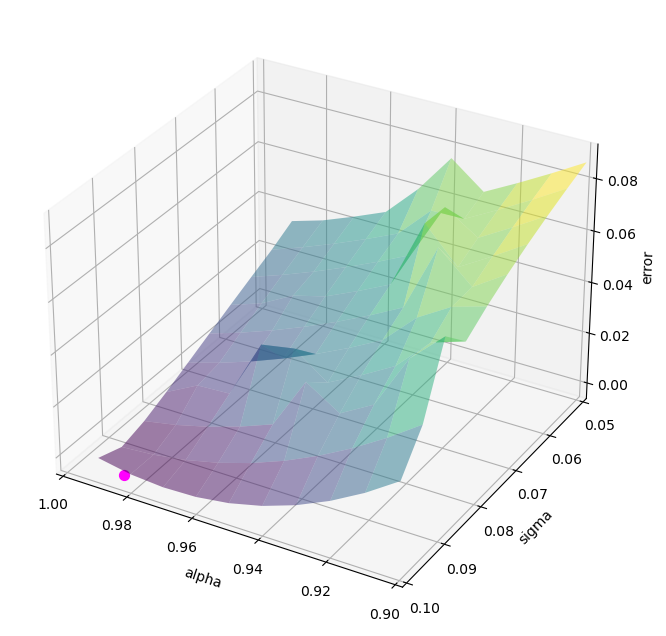

In [82]:
# 6. Defining values for alpha, sigma, and the error
N = 10
alpha_vec = np.linspace(0.9, 0.99, N)
sigma_vec = np.linspace(0.05, 0.1, N) 
error_values_vec = []

# 7. Setting initial values for alpha, sigma and the betas
alpha = 0.9
sigma = 0.1
beta0_init = 0.4
beta1_init = -0.1

# 8. Computing error values for all the different combinations of alpha and sigma 
for i, alpha in enumerate(alpha_vec):
    model.par.alpha = alpha
    for j, sigma in enumerate(sigma_vec):
        model.par.sigma = sigma
        model.par.wF = 1
        model.solve_wF_vec()
        model.run3_regression()
        #error_values[i, j] = ((model.par.beta0_target - model.sol.beta0)**2) + ((model.par.beta1_target - model.sol.beta1)**2)
        error_values = ((beta0_init - model.sol.beta0)**2) + ((beta1_init - model.sol.beta1)**2)
        #error_values = ((model.par.beta0_target - model.sol.beta0)**2) + ((model.par.beta1_target - model.sol.beta1)**2)
        if error_values > 0:   # only include non-negative deviations
            error_values_vec.append(error_values)

error_values = np.array(error_values_vec).reshape(len(alpha_vec), len(sigma_vec))


# 9. Making the plot 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
alpha_mesh, sigma_mesh = np.meshgrid(alpha_vec, sigma_vec)
ax.plot_surface(alpha_mesh, sigma_mesh, error_values, cmap='viridis',  alpha = 0.5)
ax.set_xlim(1, 0.9)
ax.set_ylim(0.1, 0.05)

# 10. Adding a pink marker for the specified point where alpha and sigma minimizes the error 
ax.scatter(0.98200402, 0.10001879, 4.494499943063444e-10, color='magenta', s=50)

# 11. Adding labels 
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('error')

# 12. Displaying the final plot
plt.show()


Here we see that the squared error is minimized when we find that $\alpha = 0.98200402$ and $\sigma = 0.10001879$ as denoted by the point. 

The economic interpretation of this is that the woman is more productive in home production as the relative productivity is $\frac{\alpha}{1-\alpha} = \frac{0.98200402}{1-0.98200402} = 54,55$. Since $\sigma$ is = 0.1 it is hard to substitute between male and female home production. 
A positive $\beta_0$ indicate that women are the ones doing most of the home production. As the $\beta_0$ in the data and the $\hat{\beta_0}$ are positive and equal to $0.4$,  women seem to work relatively more in home production than men. $\beta_1$ indicates the importance of the relative wage for the decision of who is going to work the most in the home. A negative $\beta_1$ means that if the female wage increases relative to the male wage it will lead her to work less in the home and more in the market. 


## Question 5
We make an extension to the model to see if it can help us match the data when $\alpha$ is held constant at 0.5. Our suggestion of an extension is to decrease the utility of working in the market more for women. This extension makes sense as women are more likely than men to be harrassed either on their way to work or at work than what men are. We add disutility of work to the py-file and solve the model again. 

In [83]:
# 1. Setting alpha equal to 0.5
model.par.alpha = 0.5

# 2. Setting the disutility of work for women to higher than to men. 
model.set_work_disutility_gap(0.5)

# 3. Solving the model again 
results = model.solve_discrete(do_print=True)
results = model.solve_continuous(do_print=True)
model.solve_wF_vec(discrete=False)
reg = model.run3_regression()

# 4. Printing the results
print(model.sol.beta0)
print(model.sol.beta1)
print(model.par.alpha)


/Users/miehustad/Desktop/IntroProg/examprep/inauguralproject.py:67: RuntimeWarning: divide by zero encountered in power
  # c. total consumption utility


LM = 5.0000
HM = 4.0000
LF = 3.5000
HF = 4.0000
LM = 5.0465
HM = 4.1272
LF = 3.2864
HF = 4.0526
-2.270032180514591e-06
-0.09999699569130172
0.5


Here we see that when when women have higher disutility of work in the market, they work more from home. However, this extension does not seem to help us match the data values obtained by Siminski and Yetsenga when it comes to the $\beta_0$ value. We plot to see how different values of disutility affect the estimates. 

LM = 0.0000
HM = 5.5000
LF = 18.0000
HF = 6.0000
LM = 0.0000
HM = 6.0397
LF = 24.0000
HF = 24.0000
LM = 0.0000
HM = 5.5000
LF = 13.0000
HF = 5.5000
LM = 0.0000
HM = 5.5009
LF = 12.9675
HF = 5.6596
LM = 0.0000
HM = 5.5000
LF = 9.5000
HF = 5.5000
LM = 0.0000
HM = 5.3766
LF = 9.6318
HF = 5.2658
LM = 2.0000
HM = 5.0000
LF = 7.0000
HF = 5.0000
LM = 1.8326
HM = 4.8394
LF = 7.2576
HF = 4.7520
LM = 3.0000
HM = 4.5000
LF = 5.5000
HF = 4.5000
LM = 3.0136
HM = 4.5464
LF = 5.7416
HF = 4.4642
LM = 4.0000
HM = 4.5000
LF = 4.5000
HF = 4.5000
LM = 3.9047
HM = 4.3506
LF = 4.6438
HF = 4.2721
LM = 4.5000
HM = 4.0000
LF = 4.0000
HF = 4.0000
LM = 4.6077
HM = 4.2097
LF = 3.8021
HF = 4.1336
LM = 5.5000
HM = 4.0000
LF = 3.0000
HF = 4.0000
LM = 0.0000
HM = 4.8121
LF = 5.7605
HF = 4.2776
LM = 5.5000
HM = 4.0000
LF = 2.5000
HF = 4.0000
LM = 5.6548
HM = 4.0190
LF = 2.5834
HF = 3.9464
LM = 6.0000
HM = 4.0000
LF = 2.0000
HF = 4.0000
LM = 6.0570
HM = 3.9513
LF = 2.1251
HF = 3.8800


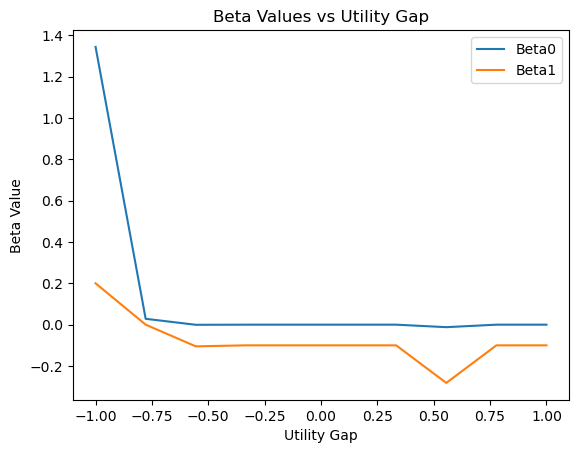

In [84]:
# 1. Generate utility gap values between -1 and 1
utility_gap_values = np.linspace(-1.0, 1.0, 10)

# 2. We make lists to store beta values
beta0_values = []
beta1_values = []

# We loop over different values of the utility gap
for gap_value in utility_gap_values:
    # Setting the value of the utility gap
    model.set_work_disutility_gap(gap_value)
    
    # Solving the model using the discrete choice method
    results = model.solve_discrete(do_print=True)
    
    # Solving the model using the continuous choice method
    results = model.solve_continuous(do_print=True)

    # Solving the model for vector of female wages and fixed male wage using continuous choice
    model.solve_wF_vec(discrete=False)
    reg = model.run3_regression()

    # Appending the estimated beta0 and beta1 to the lists
    beta0_values.append(model.sol.beta0)
    beta1_values.append(model.sol.beta1)

# Generating the line graph
plt.plot(utility_gap_values, beta0_values, label='Beta0')
plt.plot(utility_gap_values, beta1_values, label='Beta1')
plt.xlabel('Utility Gap')
plt.ylabel('Beta Value')
plt.title('Beta Values vs Utility Gap')
plt.legend()
plt.show()



We see that when the disutility gap is between $-0.75$ and $0.25$ the $\beta_1$ values is close to the estimate of Siminski and Yetsenga. Whereas for a disutility gap of approximately $-0.75$ the value of Siminiski and Yetsenga is reached.  

## Conclusion 
In this project we have modeled a houshold optimization problem both for continous and discrete choices of working hours, and also for different relative wages. What is more, we have tried to minimized the error between our model and the empirical work done by Siminski and Yetsenga. Lastly, we implemeted a disutility gap in order to see if this could help us match the empircal data when the $\alpha$ is equal to $0.5$. 